In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Import data

In [229]:
df = pd.read_csv('fish.csv')
df.head()

,length,weight,type
0,8.618381,7.848030,tuna
1,2.522046,8.762507,tuna
2,2.035690,7.101971,tuna
3,6.695008,4.953932,salmon
4,9.834069,7.908453,tuna


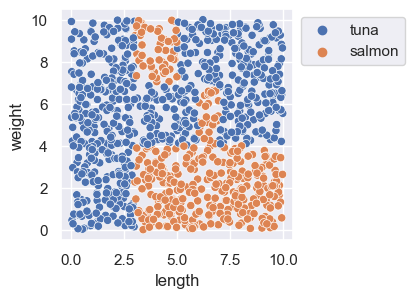

In [231]:
fig, ax = plt.subplots(figsize=(3,3))
sns.scatterplot(data=df,x='length',y='weight',hue='type')
ax.legend(bbox_to_anchor=(1,1))
plt.show()

In [74]:
df['type']=df['type'].apply(lambda t: 0 if t == 'tuna' else 1)

## Impurity criterion:
1. Entropy:
$$\text{Entropy} = -\sum_{j=1}^c p_j \log_2(p_j),$$
where $p_j$ is the proportion of the samples that belongs to class c for a particular node. For only two classes, 
$$\text{Entropy}= - \log_2(p_j) - (1-p)\log_2(1-p)$$
2. Gini index:
$$I_G = 1-\sum_{j=1}^c p_j^2.$$

In this notebook we use entropy as our impurity criterion.

In [93]:
def compute_entropy(vals):
    # vals is a list of zeros and ones (type tuna and type salmon)
    p = np.mean(vals) # proportional of ones 
    if p== 0 or p==1:
        return 0
    entropy = -p*np.log2(p) - (1-p)*np.log2(1-p)
    return entropy


def compute_entropy_from_split(df,feature,split_val,class_type):
    # get split data from dataframe 
    left = df[df[feature] < split_val][class_type]
    right = df[df[feature] >= split_val][class_type]
    
    # compute entropy for class1 and class2 data 
    left_entropy = compute_entropy(left)
    right_entropy = compute_entropy(right)
    
    # compute weighted average entropy 
    total_entropy = left_entropy*len(left)/df.shape[0] + right_entropy*len(right)/df.shape[0] 
    return [total_entropy,left_entropy,right_entropy]


In [94]:
features = df.columns[:-1]
params = {'feature': None, 'split_val': None, 'entropy':np.inf}
track_entropies = {'left_entropy':np.inf, 'right_entropy':np.inf}
step = 0.1
class_type = 'type'

In [95]:
for feature in features: 
    curr_split = df[feature].min()
    while curr_split < df[feature].max():
        # compute entropy from the split at curr_val
        [curr_entropy,curr_left_entropy,curr_right_entropy ]= compute_entropy_from_split(df,feature,curr_split,class_type)
        if curr_entropy < params['entropy']:
            # update feature and split value 
            params['feature'] = feature
            params['split_val'] = curr_split
            params['entropy'] = curr_entropy
            track_entropies['left_entropy'] = curr_left_entropy
            track_entropies['right_entropy'] = curr_right_entropy
        curr_split += step
print(params)
print(track_entropies)

{'feature': 'length', 'split_val': 3.0065456626365483, 'entropy': 0.6843553171032573}
{'left_entropy': 0, 'right_entropy': 0.9875257101057102}


## Visualize results

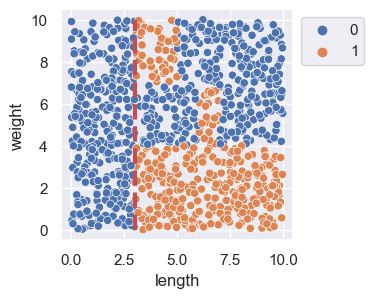

In [96]:
fig, ax = plt.subplots(figsize=(3,3))
sns.scatterplot(data=df,x='length',y='weight',hue='type')
ax.plot(params['split_val']*np.ones(50),np.linspace(df['weight'].min(),df['weight'].max(),50),'r--',linewidth=3)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

## Continue splitting the data

In [99]:
df_second_split= df[df['length'] > params['split_val']]
params2 = {'feature': None, 'split_val': None, 'entropy':np.inf}
track_entropies2 = {'left_entropy':np.inf, 'right_entropy':np.inf}
for feature in features: 
    curr_split = df_second_split[feature].min()
    while curr_split < df_second_split[feature].max():
        # compute entropy from the split at curr_val
        [curr_entropy,curr_left_entropy,curr_right_entropy ] = compute_entropy_from_split(df_second_split,feature,curr_split,class_type)
        if curr_entropy < params2['entropy']:
            # update feature and split value 
            params2['feature'] = feature
            params2['split_val'] = curr_split
            params2['entropy'] = curr_entropy
            track_entropies2['left_entropy'] = curr_left_entropy
            track_entropies2['right_entropy'] = curr_right_entropy
            
        curr_split += step
print(params2)
print(track_entropies2)

{'feature': 'weight', 'split_val': 4.001260199577321, 'entropy': 0.426763555582736}
{'left_entropy': 0, 'right_entropy': 0.7642045065086203}


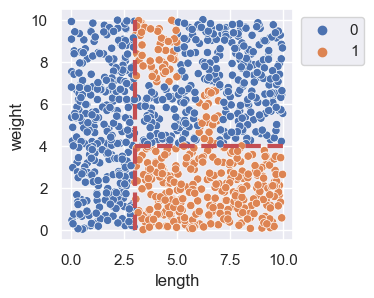

In [100]:
fig, ax = plt.subplots(figsize=(3,3))
sns.scatterplot(data=df,x='length',y='weight',hue='type')
ax.plot(params['split_val']*np.ones(50),np.linspace(df['weight'].min(),df['weight'].max(),50),'r--',linewidth=3)
ax.plot(np.linspace(df_second_split['length'].min(),df_second_split['length'].max(),50),params2['split_val']*np.ones(50),'r--',linewidth=3)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

## Rewrite evertyhing into a function 

In [232]:
df = pd.read_csv('fish.csv')
df['type']=df['type'].apply(lambda t: 0 if t == 'tuna' else 1)
df.head()

,length,weight,type
0,8.618381,7.848030,0
1,2.522046,8.762507,0
2,2.035690,7.101971,0
3,6.695008,4.953932,1
4,9.834069,7.908453,0


In [235]:
def compute_entropy(vals):
    # vals is a list of zeros and ones (type tuna and type salmon)
    p = np.mean(vals) # proportional of ones 
    if p== 0 or p==1:
        return 0
    entropy = -p*np.log2(p) - (1-p)*np.log2(1-p)
    return entropy


def compute_entropy_from_split(df,feature,split_val,class_type):
    # get split data from dataframe 
    left = df[df[feature] < split_val][class_type]
    right = df[df[feature] >= split_val][class_type]
    
    # compute entropy for class1 and class2 data 
    left_entropy = compute_entropy(left)
    right_entropy = compute_entropy(right)
    
    # compute weighted average entropy 
    total_entropy = left_entropy*len(left)/df.shape[0] + right_entropy*len(right)/df.shape[0] 
    return [total_entropy,left_entropy,right_entropy]

def decision_tree(df,features,class_type,depth,step):
    params = {'feature': [None]*depth, 'split_val': [None]*depth, 'entropy':[np.inf]*depth}
    track_entropies= {'left_entropy':[np.inf]*depth, 'right_entropy':[np.inf]*depth}
    df_dt = df.copy() # so the original df is not modified
    for layer in range(depth):
        for feature in features: 
            curr_split = df_dt [feature].min()
            while curr_split < df_dt [feature].max():
                # compute entropy from the split at curr_val
                [curr_entropy, curr_left_entropy, curr_right_entropy]= compute_entropy_from_split(df_dt ,feature,curr_split,class_type)
                if curr_entropy < params['entropy'][layer]:
                    # update feature and split value 
                    params['feature'][layer] = feature
                    params['split_val'][layer] = curr_split
                    params['entropy'][layer] = curr_entropy
                    track_entropies['left_entropy'][layer] = curr_left_entropy
                    track_entropies['right_entropy'][layer] = curr_right_entropy
                curr_split += step
        # update dataframe 
        if track_entropies['left_entropy'] < track_entropies['right_entropy']:
            df_dt = df_dt[df_dt[params['feature'][layer]] > params['split_val'][layer]]
        else:
            df_dt = df_dt[df_dt[params['feature'][layer]] < params['split_val'][layer]]
        # if the current split is the same as the previous stop, stop the algorithm
        if layer > 0 and params['feature'][layer] == params['feature'][layer-1]:
            params['feature']= params['feature'][:layer]
            params['split_val'] = params['split_val'][:layer]
            params['entropy'] = params['entropy'][:layer]
            track_entropies['left_entropy'] = track_entropies['left_entropy'][:layer]
            track_entropies['right_entropy']= track_entropies['right_entropy'][:layer]
            break 
    return params, track_entropies

{'feature': ['length', 'weight', 'length'], 'split_val': [3.0065456626365483, 4.001260199577321, 7.008879131610914], 'entropy': [0.6843553171032573, 0.426763555582736, 0.5524718527527053]} 

 {'left_entropy': [0, 0, 0.9630928243932295], 'right_entropy': [0.9875257101057102, 0.7642045065086203, 0]} 




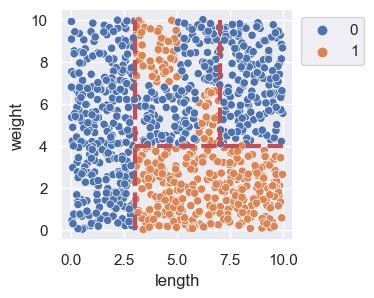

In [236]:
features = df.columns[:-1]
params = {'feature': None, 'split_val': None, 'entropy':np.inf}
step = 0.1
depth = 10
class_type = 'type'

[params,track_entropies] = decision_tree(df,features,class_type,depth,step)
print(params,'\n\n',track_entropies, '\n\n')

fig, ax = plt.subplots(figsize=(3,3))
sns.scatterplot(data=df,x='length',y='weight',hue='type')
df_temp = df.copy()
# first layer 
layer = 0
if params['feature'][layer] == features[0]:
    xvec = params['split_val'][layer]*np.ones(50)
    yvec = np.linspace(df_temp[features[1]].min(),df_temp[features[1]].max(),50)

else: #params['feature'][layer] == features[1]:
    xvec = np.linspace(df_temp[features[0]].min(),df_temp[features[0]].max(),50)
    yvec = params['split_val'][layer]*np.ones(50)
ax.plot(xvec,yvec,'r--',linewidth=3)
for layer in range(1,len(params['feature'])):
    if params['feature'][layer] == features[0]: # splitting on length 
        if track_entropies['left_entropy'][layer-1] < track_entropies['right_entropy'][layer-1]:
            df_temp = df_temp[df_temp[features[1]] > params['split_val'][layer-1]]
        else: 
            df_temp = df_temp[df_temp[features[1]] < params['split_val'][layer-1]]
        xvec = params['split_val'][layer]*np.ones(50)
        yvec = np.linspace(df_temp[features[1]].min(),df_temp[features[1]].max(),50)
    else: # splitting on weight 
        if track_entropies['left_entropy'][layer-1] < track_entropies['right_entropy'][layer-1]:
             df_temp = df_temp[df_temp[features[0]] > params['split_val'][layer-1]]
        else: 
            df_temp = df_temp[df_temp[features[0]] < params['split_val'][layer-1]]
        xvec = np.linspace(df_temp[features[0]].min(),df_temp[features[0]].max(),50)
        yvec = params['split_val'][layer]*np.ones(50)
    ax.plot(xvec,yvec,'r--',linewidth=3)

ax.legend(bbox_to_anchor=(1,1))
plt.show()
